# Introduction to the dataset

The dataset is composed of two main classes:

1. **Random quantum circuits**  ("dataset_random")

   These are generated by fixing the number of qubits, a range of total quantum gates, and the universal gate set to sample from.

2. **Structured circuits: 1D Transverse Ising Model (TIM)**  ("dataset_tim")

   These are generated by fixing the number of qubits, the number of Trotter steps, and the coupling factors.

   The Hamiltonian for the 1D Transverse Ising Model is given by:

   $$
   H = -J \sum_{i} \sigma_i^x \sigma_{i+1}^x - h \sum_{i} \sigma_i^z
   $$

     where $ J $ is the coupling constant, $ h $ is the transverse field, and $ \sigma_i^x $, $ \sigma_i^z $ are the Pauli matrices acting on the $ i $-th qubit.


In [1]:
import pickle
import os
import re  # Import the regular expression module

directory = 'dataset_random'
num_qubits = 2

print(f"Dataset: {directory}\nNumber of qubits: {num_qubits}")
total_qc = 0
cumulative_gate_range = [0, 0]  # Initialize cumulative range

# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    
    if filename.endswith('.pkl') and f"qubits_{num_qubits}" in filename:
        # Extract gate range from filename
        match = re.search(r'gates_(\d+)-(\d+)', filename)
        if match:
            gate_range = [int(match.group(1)), int(match.group(2))]
            # Update cumulative range
            cumulative_gate_range[0] = min(cumulative_gate_range[0], gate_range[0])
            cumulative_gate_range[1] = max(cumulative_gate_range[1], gate_range[1])
        
        # Read the file 
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
        total_qc += len(data)

print(f"Total number of circuits: {total_qc}")
print(f"Cumulative gate range: {cumulative_gate_range[0]}-{cumulative_gate_range[1]}")

Dataset: dataset_random
Number of qubits: 2
Total number of circuits: 50000
Cumulative gate range: 0-99


## Classical Representation of Quantum Circuits

We take a generic file to describe the dataset

In [2]:
filename = "basis_rotations+cx_qubits_3_gates_0-19.pkl"
file_path = os.path.join(directory, filename)

# Read the file 
with open(file_path, 'rb') as file:
    data = pickle.load(file)

features, label = data[0]
# Printing to describe the data
print(f"File name: {filename} \nTotal number of circuits: {len(data)} \nNumber of qubits: {data[0][0]['num_qubits']}")
# print("QASM Representation:\n", features["qasm"])

File name: basis_rotations+cx_qubits_3_gates_0-19.pkl 
Total number of circuits: 10000 
Number of qubits: 3



## Classical Shadows

The total number of observables predicted by classical shadows on an $n$-qubit circuit is given by:

$$ F(n) = 3n + 9 \binom{n}{2} $$


In [3]:
print("Classical Shadows:")
# print("Number of observables: ", len(features.keys())-4)
for key in list(features.keys())[4:]:
    print(key, ": ", features[key])

Classical Shadows:
obs_X(0) @ I(1) @ I(2) :  -1.05
obs_Y(0) @ I(1) @ I(2) :  0.12
obs_Z(0) @ I(1) @ I(2) :  0.33
obs_I(0) @ X(1) @ I(2) :  -0.09
obs_I(0) @ Y(1) @ I(2) :  0.15
obs_I(0) @ Z(1) @ I(2) :  -0.87
obs_I(0) @ I(1) @ X(2) :  0.33
obs_I(0) @ I(1) @ Y(2) :  -0.42
obs_I(0) @ I(1) @ Z(2) :  0.57
obs_X(0) @ X(1) @ I(2) :  -0.18
obs_X(0) @ Y(1) @ I(2) :  -0.45
obs_X(0) @ Z(1) @ I(2) :  0.09
obs_Y(0) @ X(1) @ I(2) :  0.45
obs_Y(0) @ Y(1) @ I(2) :  0.45
obs_Y(0) @ Z(1) @ I(2) :  -0.27
obs_Z(0) @ X(1) @ I(2) :  0.09
obs_Z(0) @ Y(1) @ I(2) :  0.27
obs_Z(0) @ Z(1) @ I(2) :  -0.09
obs_X(0) @ I(1) @ X(2) :  0.27
obs_X(0) @ I(1) @ Y(2) :  0.63
obs_X(0) @ I(1) @ Z(2) :  -0.81
obs_Y(0) @ I(1) @ X(2) :  -0.27
obs_Y(0) @ I(1) @ Y(2) :  -0.81
obs_Y(0) @ I(1) @ Z(2) :  0.0
obs_Z(0) @ I(1) @ X(2) :  -0.72
obs_Z(0) @ I(1) @ Y(2) :  0.27
obs_Z(0) @ I(1) @ Z(2) :  0.36
obs_I(0) @ X(1) @ X(2) :  -0.36
obs_I(0) @ X(1) @ Y(2) :  0.36
obs_I(0) @ X(1) @ Z(2) :  0.0
obs_I(0) @ Y(1) @ X(2) :  -0.09
obs_I(0)

## DAG Representation

We save an image representing the graph representation of a random circuit

Quantum Circuit:


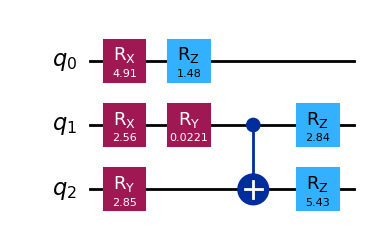

Directed Acyclic Graph (DAG) Representation:


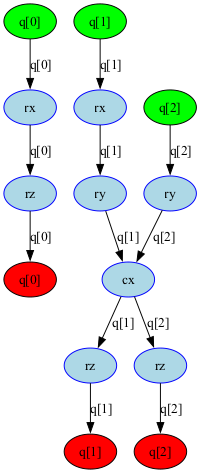

In [7]:

from qiskit.visualization import dag_drawer
from qiskit import QuantumCircuit
%matplotlib inline
from matplotlib import pyplot as plt


qasm_str = features["qasm"]
qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw("mpl")
print("Quantum Circuit:")
plt.show()
# Save the dag image
# dag_drawer(data[0][0]["dag"], filename= "dataset_random/images/dag.png")
print("Directed Acyclic Graph (DAG) Representation:")
dag_drawer(features["dag"])

## Label
### Stabilizer Renyi Entropy


Quantum magic refers to the property of quantum states that distinguishes them from classical stabilizer states, which can be efficiently simulated on a classical computer. Magic is critical for universal quantum computation, as stabilizer operations alone are not sufficient for universal quantum gates. 

A quantitative measure of quantum magic is provided by the *Stabilizer Rényi Entropy*. For a pure $n$-qubit quantum state $\rho$, the stabilizer Rényi entropy of order $\alpha$, denoted $S_\alpha(\rho)$, is defined as:

$$ S_{\alpha} (\rho)= \frac{1}{1-\alpha} \log \sum_{P\in \mathcal{P}_n}\Xi^{\alpha}_P(\rho) -\log(2^n)$$

where $\mathcal{P}_n$ denotes the set of $n$-qubit Pauli strings, and $\Xi_P(\rho) = \frac{1}{2^n} \text{Tr}(\rho P)^2$. 

A *Pauli string* is a tensor product of Pauli matrices, each acting on a different qubit in an $n$-qubit system. The Pauli matrices form a basis for the space of $2 \times 2$ matrices:

$$
I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.$$

When $\rho$ is a stabilizer state, we have $S_{\alpha}(\rho) = 0$ for all $\alpha$. For non-stabilizer states, $S_\alpha(\rho)$ quantifies the degree of non-classicality (magic) in the state. 

The stabilizer Rényi entropy serves as a crucial tool for quantifying quantum resources and understanding the computational advantage provided by quantum magic. In our experiments, we use $\alpha = 2$ following previous studies.

Although the stabilizer Rényi entropy is generally hard to compute, efficient approximations exist for certain structured states such as matrix product states.



In [5]:
print("SRE: ", label)

SRE:  0.3821197982137323
